In [177]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [178]:
data= pd.read_csv("./google-play-store-apps/googleplaystore.csv")

In [179]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [180]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Calculate the percentage of missing values in each column

In [181]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
App,0,0.000000
Category,0,0.000000
Rating,1474,0.135965
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,1,0.000092
Genres,0,0.000000


#### Dropping the missing values in the dataset

In [182]:
data.dropna(inplace=True)

In [183]:
data.shape


(9360, 13)

#### Creating Dummy Variables

In [184]:
data.head(3)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [185]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [186]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [187]:
data['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [188]:
data['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [189]:
# Create dummy variables for the 'Category' column of the 'data' DataFrame and store the result in a new DataFrame called 'catgry'
catgry=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)

# Create dummy variables for the 'Type' column of the 'data' DataFrame and store the result in a new DataFrame called 'typ'
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)

# Create dummy variables for the 'Content Rating' column of the 'data' DataFrame and store the result in a new DataFrame called 'cr'
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)

# Create a list 'frames' containing the original 'data' DataFrame and the new 'catgry', 'typ', and 'cr' DataFrames
frames=[data,catgry,typ,cr]

# Concatenate the DataFrames in the 'frames' list along the columns axis (i.e., horizontally) and store the result in the 'data' DataFrame
data=pd.concat(frames,axis=1)

# Drop the original 'Category', 'Installs', 'Type', and 'Content Rating' columns from the 'data' DataFrame along the columns axis (i.e., horizontally)
# and update the 'data' DataFrame in place
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)


In [190]:
# Drop the columns 'App', 'Size', 'Price', 'Genres', 'Last Updated', 'Current Ver', and 'Android Ver' from the 'data' DataFrame along the columns axis (i.e., horizontally)
# and update the 'data' DataFrame in place
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)


In [191]:
data.head(3)


,Rating,Reviews,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,catg_DATING,catg_EDUCATION,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [192]:
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [194]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#### Training & Testing of Model

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

## LogisticRegression

In [196]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.7644230769230769


## DecisionTree Classifier

In [197]:
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

In [198]:
# plt.figure(figsize=(10,5))
# plt.title("dtree_cm")
# #sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)

print('DecisionTree_Classifier_accuracy:',dtree_ac)

DecisionTree_Classifier_accuracy: 0.6816239316239316


## SVM regressor

In [199]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)
# plt.figure(figsize=(10,5))
# plt.title("svm_cm")
# #sns.heatmap(svr_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

SVM_regressor_accuracy: 0.7644230769230769


## RandomForest

In [200]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
# plt.figure(figsize=(10,5))
# plt.title("rdf_cm")
# #sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)


RandomForest_accuracy: 0.7013888888888888


### Models comparision

Text(0.5, 1.0, 'Model Accracy')

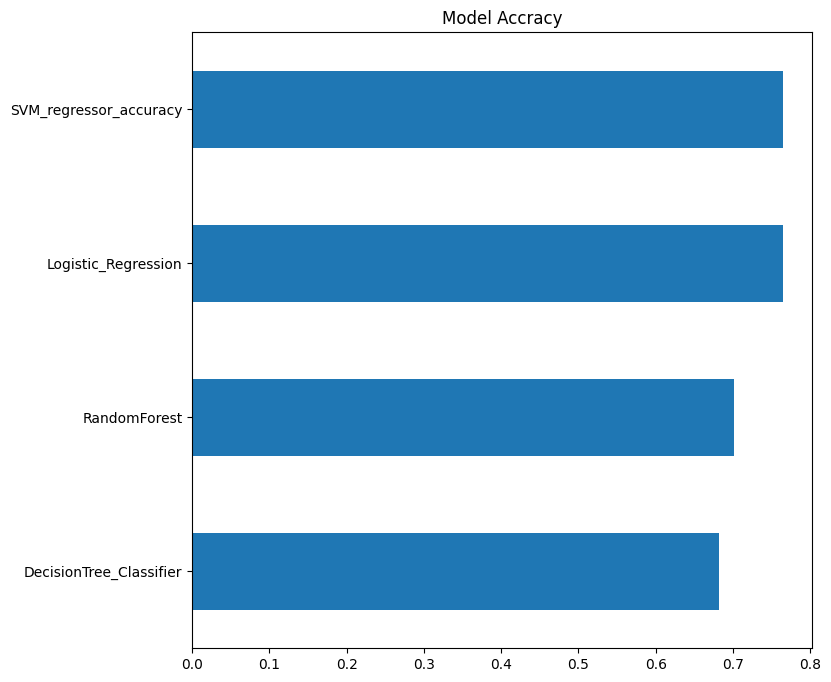

In [201]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')
